In [38]:
!pip install yfinance
!pip install matplotlib
!pip install seaborn
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [36]:
data = yf.download('CW8.PA','2016-01-01','2022-07-01')

[*********************100%***********************]  1 of 1 completed


[{'d': '05', 'v': 283.30577596028644}, {'d': '15', 'v': 284.2177459716797}, {'d': '12', 'v': 284.57293049205435}, {'d': '06', 'v': 284.71826990300957}, {'d': '19', 'v': 285.17013662832755}, {'d': '20', 'v': 285.70566087202593}, {'d': '27', 'v': 286.0282970081676}, {'d': '13', 'v': 286.0292249608923}, {'d': '08', 'v': 286.09112875802174}, {'d': '02', 'v': 286.4713265345647}, {'d': '18', 'v': 286.61502213911575}, {'d': '07', 'v': 286.68852206143464}, {'d': '26', 'v': 286.9020025215897}, {'d': '29', 'v': 286.978448007621}, {'d': '04', 'v': 287.6157932281494}, {'d': '22', 'v': 287.8702461936257}, {'d': '11', 'v': 287.88439410073414}, {'d': '21', 'v': 288.25967726273973}, {'d': '09', 'v': 288.4547023066768}, {'d': '14', 'v': 288.4978117766204}, {'d': '01', 'v': 288.5057816201068}, {'d': '23', 'v': 288.9668952094184}, {'d': '16', 'v': 289.13446920889396}, {'d': '28', 'v': 289.52381741559066}, {'d': '31', 'v': 289.74962662205553}, {'d': '03', 'v': 290.1305406358507}, {'d': '24', 'v': 290.7093

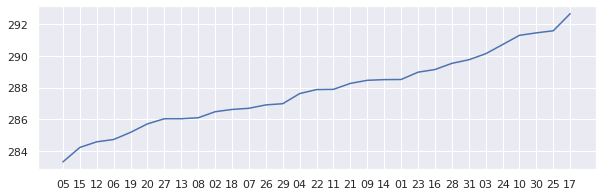

In [45]:
sorted_data = []
curr_month = -1
sorted_monthly_data = []

for index, row in data.iterrows():
    average = (row[0] + row[1]) / 2
    curr_timestamp = str(index)
    if curr_month != curr_timestamp.split(" ")[0].split("-")[1]:
        sorted_monthly_data = sorted(sorted_monthly_data, key=lambda d: d['v'])
        for d1 in sorted_monthly_data:
            created = False
            for d2 in sorted_data:
                if d2["d"] == d1["d"]:
                    created = True
                    d2["v"] += d1["v"]
                    d2["c"] += 1
            if not created:
                sorted_data.append({"d": d1["d"], "v": d1["v"], "c": 1})
        sorted_monthly_data = []
        curr_month = curr_timestamp.split(" ")[0].split("-")[1]
    sorted_monthly_data.append({"d": curr_timestamp.split(" ")[0].split("-")[2], "v": average})

for d in sorted_data:
    d["v"] = d["v"] / d["c"]
    d.pop("c", None)

sorted_data = sorted(sorted_data, key=lambda d: d['v'])
print(sorted_data)

xd = []
yv = []
for d in sorted_data:
    xd.append(d["d"])
    yv.append(d["v"])

sns.set(rc={'figure.figsize':(10,3)})

sns.lineplot(x=xd, y=yv)
plt.show()